## Basic Stock Market Analysis (Not Yet Complete)

In [227]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
quandl.ApiConfig.api_key = ""

In [228]:
#Creating datetime objects
start = pd.to_datetime('2016-01-28')
end = pd.to_datetime('2020-01-28')
api_key = ''
#These are real time data sets
AAPL_data = quandl.get("EOD/AAPL", authtoken=api_key,start_date=start, end_date=end)
IBM_data = quandl.get("EOD/IBM", authtoken=api_key, start_date=start, end_date=end)
AMZN_data = quandl.get("EOD/AMZN", authtoken=api_key,start_date=start, end_date=end)
GOOGL_data = quandl.get("EOD/GOOGL", authtoken=api_key,start_date=start, end_date=end)
TSLA_data = quandl.get("EOD/TSLA", authtoken=api_key,start_date=start, end_date=end)

### Functions

In [229]:
def total_traded(df1,df2,df3): # Creates a dataframe called 'total_traded' that consists
# of the product of a stock's volume and open price, returns a column vector time series
    df1['Total Traded'] = df1['Open']*df1['Volume']
    df2['Total Traded'] = df2['Open']*df2['Volume']
    df3['Total Traded'] = df3['Open']*df3['Volume'] 
    total_traded = pd.concat([df1['Total Traded'], 
                          df2['Total Traded'], 
                          df3['Total Traded']], axis = 1)
    return total_traded

In [230]:
def get_returns(df1, df2, df3): # Creates a dataframe called 'get_returns' that consists
# of the percent changes of the closing products for each stock, Returns three columns
    df1['returns'] = df1['Close'].pct_change(1)
    df2['returns'] = df2['Close'].pct_change(1)
    df3['returns'] = df3['Close'].pct_change(1)
    return df1['returns'], df2['returns'], df3['returns']

In [231]:
def create_df(column, df_1, df_2, df_3): # Basic dataframe constructor method, returns a dataframe
    col1 = df_1[str(column)]
    col2 = df_2[str(column)]
    col3 = df_3[str(column)]
    df = pd.concat([col1, col2, col3], axis =1)
    return df

### Constructing stock_open dataframe

In [232]:
TSLA_data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2016-01-28,190.79,191.28,182.41,189.70,4592754.0,0.0,1.0,38.158,38.256,36.482,37.940,22963770.0
2016-01-29,189.95,193.74,188.08,191.20,2852289.0,0.0,1.0,37.990,38.748,37.616,38.240,14261445.0
2016-02-01,188.76,199.52,182.75,196.94,5297639.0,0.0,1.0,37.752,39.904,36.550,39.388,26488195.0
2016-02-02,192.42,193.12,180.23,182.78,5773637.0,0.0,1.0,38.484,38.624,36.046,36.556,28868185.0
2016-02-03,183.59,183.94,170.18,173.48,7931362.0,0.0,1.0,36.718,36.788,34.036,34.696,39656810.0


In [233]:
stocks_open = create_df('Open', GOOGL_data, TSLA_data, AMZN_data)
stocks_open.columns = ['GOOG', 'TSLA', 'AMZN']

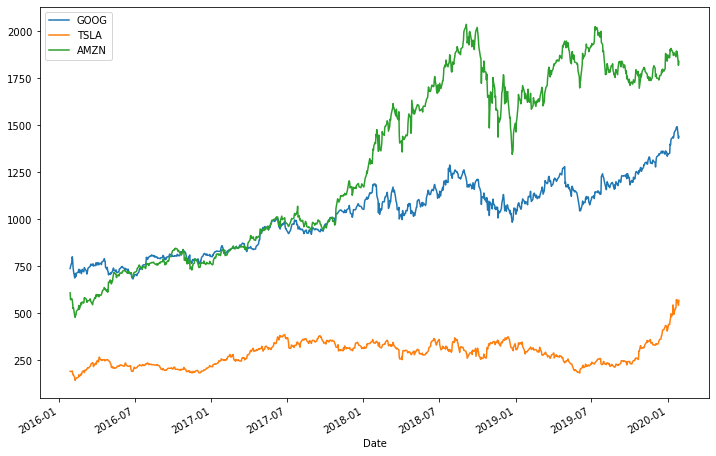

In [234]:
stocks_open.plot(label = 'Open Prices', figsize = (12,8))

### Creating stock_volume dataframe

In [235]:
stock_volumes = create_df('Volume', GOOGL_data, TSLA_data, AMZN_data)
stock_volumes.columns = ['GOOG', 'TSLA', 'AMZN']

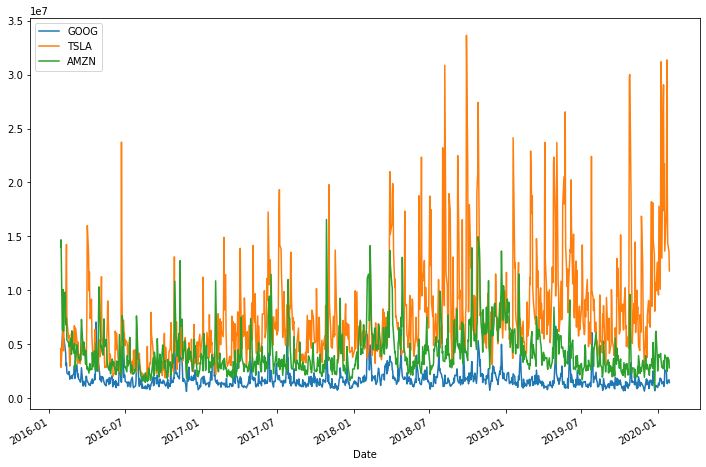

In [236]:
stock_volumes.plot(figsize = (12,8))

In [237]:
stock_volumes['TSLA'].argmax()

673

In [238]:
total_traded = total_traded(TSLA_data, AMZN_data, GOOGL_data)
total_traded.columns = ['TSLA', 'AMZN', 'GOOGL']

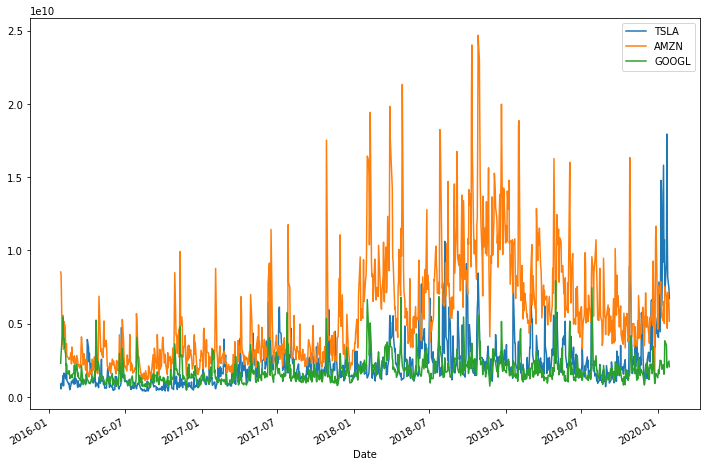

In [239]:
total_traded.plot(figsize = (12,8))

### Finding 50 and 200 day moving averages

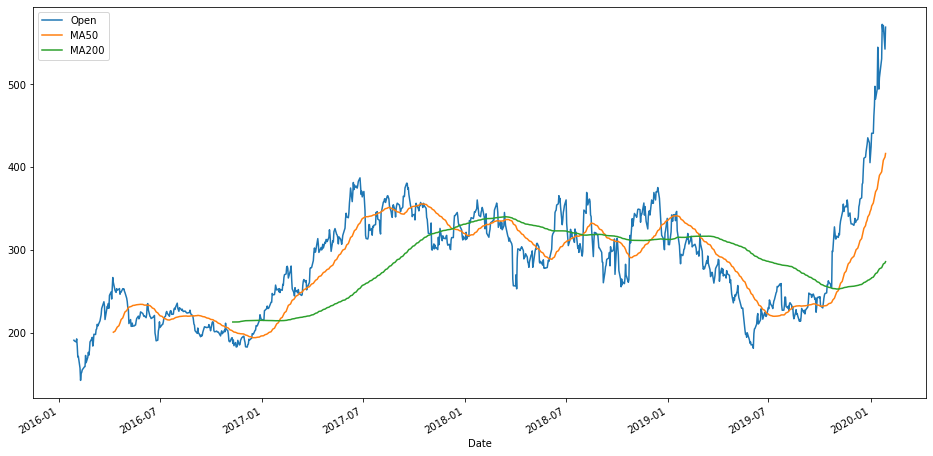

In [240]:
TSLA_data['MA50']  = stocks_open['TSLA'].rolling(50).mean()
TSLA_data['MA200']  = stocks_open['TSLA'].rolling(200).mean()
TSLA_data[['Open','MA50','MA200']].plot(label = 'Tesla Open Rolling Averages',figsize = (16,8))

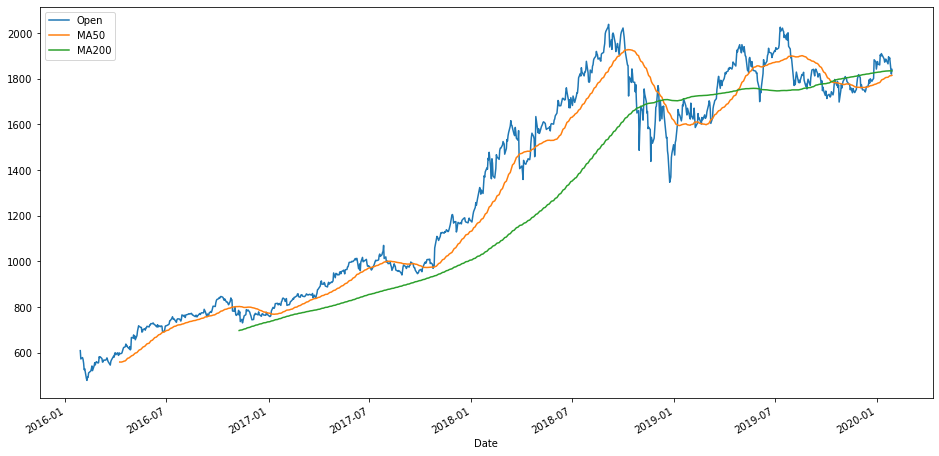

In [241]:
AMZN_data['MA50']  = stocks_open['AMZN'].rolling(50).mean()
AMZN_data['MA200']  = stocks_open['AMZN'].rolling(200).mean()
AMZN_data[['Open','MA50','MA200']].plot(figsize = (16,8))

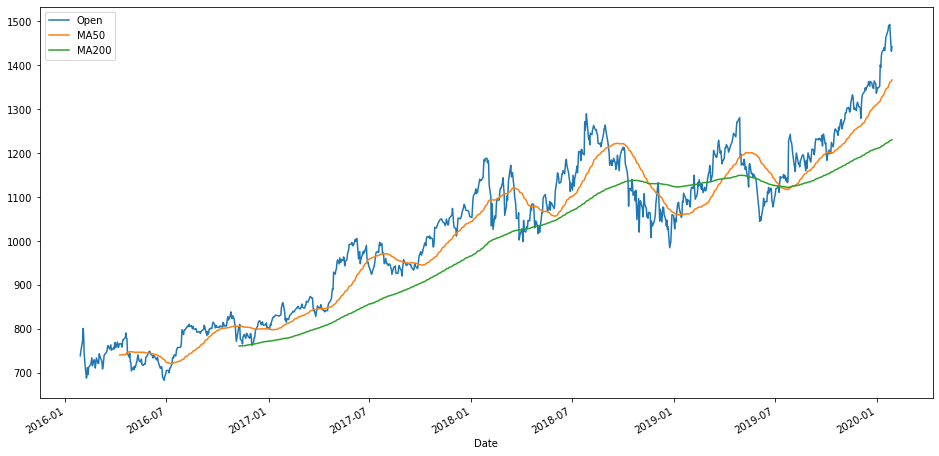

In [242]:
GOOGL_data['MA50']  = stocks_open['GOOG'].rolling(50).mean()
GOOGL_data['MA200']  = stocks_open['GOOG'].rolling(200).mean()
GOOGL_data[['Open','MA50','MA200']].plot(figsize = (16,8))

### Using scatter_matrix() to check if stocks have positive or negative correlation

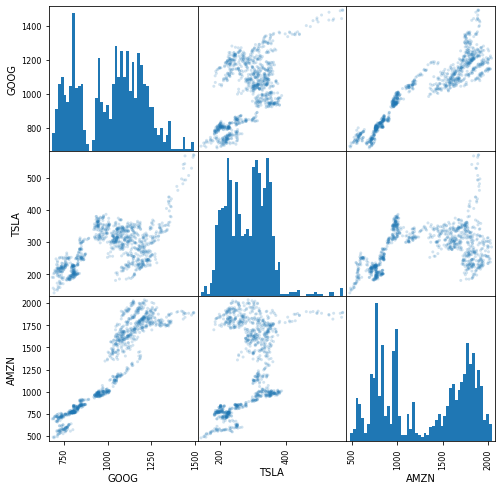

In [243]:
scatter_matrix(stocks_open, figsize = (8,8), alpha = 0.2, hist_kwds={'bins':50});

### Kernal Density Estimation, Box Plot, and Histograms of our returns

In [244]:
TSLA_data['returns'], GOOGL_data['returns'], AMZN_data['returns'] = get_returns(TSLA_data, GOOGL_data, AMZN_data)

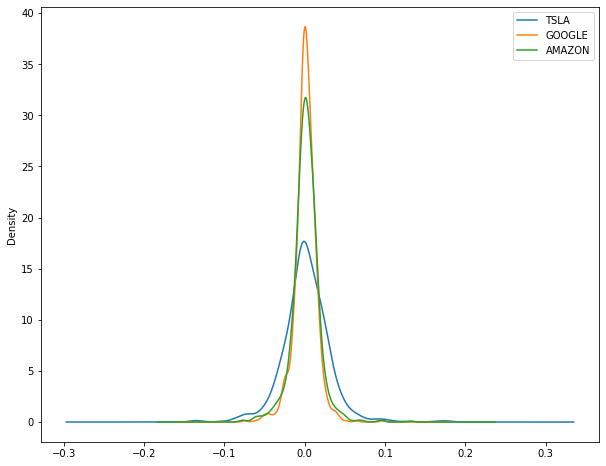

In [245]:
#AAPL_data['returns'].hist(bins=100,label='AAPLE',alpha=0.5)
TSLA_data['returns'].plot(kind='kde',label='TSLA',figsize=(10,8))
GOOGL_data['returns'].plot(kind='kde',label='GOOGLE')
AMZN_data['returns'].plot(kind='kde', label ='AMAZON')
plt.legend()

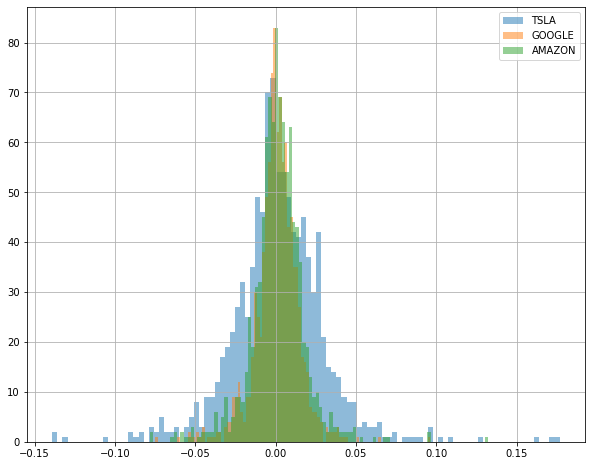

In [246]:
TSLA_data['returns'].hist(bins=100,label='TSLA',figsize=(10,8),alpha=0.5)
GOOGL_data['returns'].hist(bins=100,label='GOOGLE',alpha=0.5)
AMZN_data['returns'].hist(bins=100, label ='AMAZON', alpha=0.5)
plt.legend()

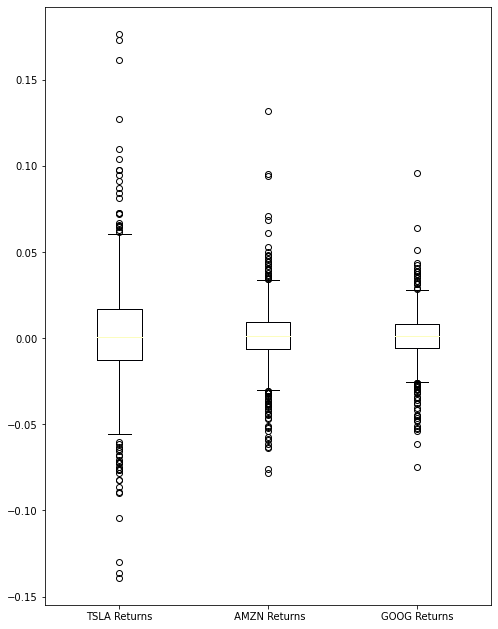

In [247]:
box_df = pd.concat([TSLA_data['returns'],AMZN_data['returns'],GOOGL_data['returns']],axis=1)
box_df.columns = ['TSLA Returns',' AMZN Returns','GOOG Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='magma')

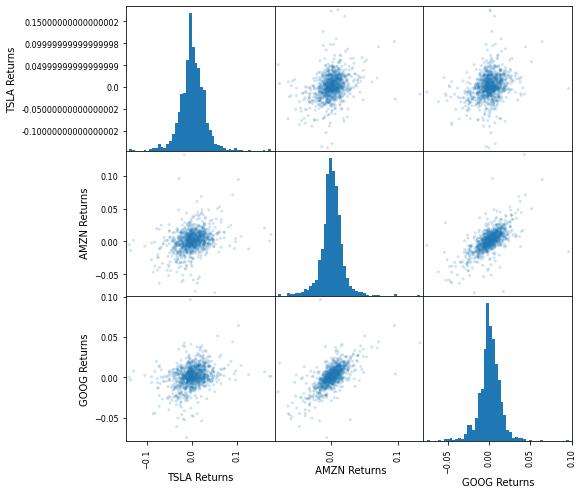

In [248]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

### Cumulative Returns

In [249]:
GOOGL_data['Cumulative Return'] = (1 + GOOGL_data['returns']).cumprod()
AMZN_data['Cumulative Return'] = (1 + AMZN_data['returns']).cumprod()
TSLA_data['Cumulative Return'] = (1 + TSLA_data['returns']).cumprod()

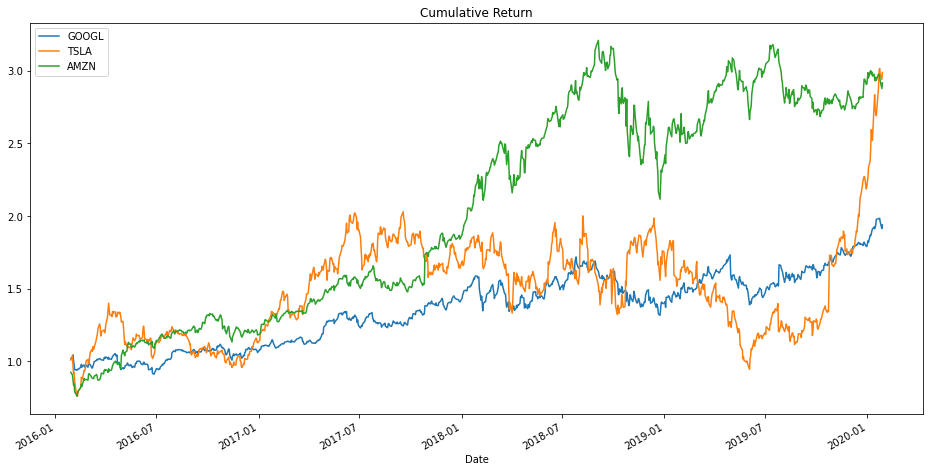

In [250]:
GOOGL_data['Cumulative Return'].plot(label='GOOGL',figsize=(16,8),title='Cumulative Return')
TSLA_data['Cumulative Return'].plot(label='TSLA')
AMZN_data['Cumulative Return'].plot(label='AMZN')
plt.legend()

### Broken Code (multiple packages depricated), I was trying to create box and whisker plots...

In [80]:
#import mplfinance as fplt
#from mplfinance import candlestick_ohlc
#from matplotlib.dates import *

In [68]:
#pip install --upgrade mplfinance


Note: you may need to restart the kernel to use updated packages.


In [74]:
#aapl_reset = AAPL_data.loc['2020-01'].reset_index()

In [84]:
#mondays = WeekdayLocator(MONDAY)
#alldays = DayLocator()
#weekFormatter = DateFormatter('%b %d')
#dayFormatter = DateFormatter('%d')

In [81]:
#aapl_reset['date_ax'] = aapl_reset['Date'].apply(lambda date: date2num(date))

In [82]:
#list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
#aapl_values = [tuple(vals) for vals in aapl_reset[list_of_cols].values]
#aapl_values

[(737426.0, 296.24, 300.6, 295.19, 300.35),
 (737427.0, 297.15, 300.58, 296.5, 297.43),
 (737430.0, 293.79, 299.96, 292.75, 299.8),
 (737431.0, 299.84, 300.9, 297.48, 298.39),
 (737432.0, 297.16, 304.4399, 297.156, 303.19),
 (737433.0, 307.235, 310.43, 306.2, 309.63),
 (737434.0, 310.6, 312.67, 308.25, 310.33),
 (737437.0, 311.64, 317.07, 311.15, 316.96),
 (737438.0, 316.7, 317.57, 312.17, 312.68),
 (737439.0, 311.85, 315.5, 309.55, 311.34),
 (737440.0, 313.59, 315.7, 312.09, 315.24),
 (737441.0, 316.27, 318.74, 315.0, 318.73),
 (737445.0, 317.19, 319.02, 316.0, 316.57),
 (737446.0, 318.58, 319.99, 317.31, 317.7),
 (737447.0, 317.92, 319.56, 315.65, 319.23),
 (737448.0, 320.25, 323.33, 317.5188, 318.31),
 (737451.0, 310.06, 311.77, 304.88, 308.95),
 (737452.0, 312.6, 318.4, 312.19, 317.69),
 (737453.0, 324.45, 327.85, 321.38, 324.34),
 (737454.0, 320.5435, 324.09, 318.75, 323.87),
 (737455.0, 320.93, 322.68, 308.29, 309.51)]

In [85]:
#fig, ax = plt.subplots()
#fig.subplots_adjust(bottom = .2)
#ax.xaxis.set_minor_locator(alldays)
#ax.xaxis.set_major_formatter(weekFormatter)

#candlestick_ohlc(ax, aapl_values, width = .5, colorup = 'g', colordown = 'r')

NameError: name 'candlestick_ohlc' is not defined

ValueError: DateFormatter found a value of x=0, which is an illegal date; this usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

<Figure size 432x288 with 1 Axes>

In [112]:
#AAPL_data['returns'] = AAPL_data['Close'].pct_change(1)
#AAPL_data['returns']

Date
2015-09-28         NaN
2015-09-29   -0.030060
2015-09-30    0.008161
2015-10-01   -0.003365
2015-10-02    0.007301
                ...   
2020-09-22    0.015716
2020-09-23   -0.041946
2020-09-24    0.010269
2020-09-25    0.037516
2020-09-28    0.023869
Name: returns, Length: 1260, dtype: float64

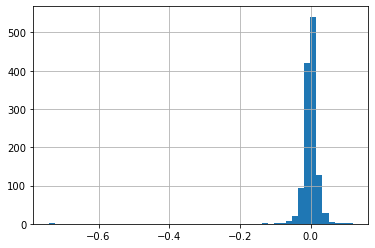

In [92]:
#AAPL_data['returns'].hist(bins = 50)

box_df.plot(kind='scatter',x=' AMZN Returns',y='GOOG Returns',alpha=0.4,figsize=(10,8))